In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
Books = pd.read_csv('C:/Users/USER/Desktop/Live Project 3/Dataset/Books.csv')
Rating = pd.read_csv('C:/Users/USER/Desktop/Live Project 3/Dataset/Ratings.csv')
User = pd.read_csv('C:/Users/USER/Desktop/Live Project 3/Dataset/Users.csv')

# Data Preprocessing

# Checking Books Data

In [3]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print("Columns: ", list(Books.columns))

Columns:  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [5]:
Books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [6]:
Books.rename(columns = {'Year-Of-Publication':'YearOfPublication'}, inplace = True)

In [7]:
Books.dtypes

ISBN                 object
Book-Title           object
Book-Author          object
YearOfPublication    object
Publisher            object
Image-URL-S          object
Image-URL-M          object
Image-URL-L          object
dtype: object

In [8]:
Books.isnull().sum()

ISBN                 0
Book-Title           0
Book-Author          1
YearOfPublication    0
Publisher            2
Image-URL-S          0
Image-URL-M          0
Image-URL-L          3
dtype: int64

In [9]:
Books_URL = Books[['Image-URL-S', 'Image-URL-M', 'Image-URL-L']]
Books = Books[['ISBN', 'Book-Title', 'Book-Author', 'YearOfPublication', 'Publisher']]
Books.head()

,ISBN,Book-Title,Book-Author,YearOfPublication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [10]:
Books.loc[Books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,YearOfPublication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [11]:
Books.loc[Books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,YearOfPublication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [12]:
Books.at[187689 ,'Book-Author'] = 'Other'
Books.at[128890 ,'Publisher'] = 'Other'
Books.at[129037 ,'Publisher'] = 'Other'

In [13]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   Book-Title         271360 non-null  object
 2   Book-Author        271360 non-null  object
 3   YearOfPublication  271360 non-null  object
 4   Publisher          271360 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [14]:
print(f'Duplicate entries: {Books.duplicated().sum()}')

Duplicate entries: 0


In [15]:
Books.YearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
Books.loc[Books['YearOfPublication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,YearOfPublication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [17]:
Books.loc[Books['YearOfPublication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,YearOfPublication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [18]:
# making Correction
Books.loc[Books.ISBN == '0789466953','YearOfPublication'] = 2000
Books.loc[Books.ISBN == '0789466953','Book-Author'] = "James Buckley"
Books.loc[Books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
Books.loc[Books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

Books.loc[Books.ISBN == '078946697X','YearOfPublication'] = 2000
Books.loc[Books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
Books.loc[Books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
Books.loc[Books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

Books.loc[(Books.ISBN == '0789466953') | (Books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,YearOfPublication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [19]:
Books.loc[Books.ISBN == '2070426769','YearOfPublication'] = 2003
Books.loc[Books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
Books.loc[Books.ISBN == '2070426769','Publisher'] = "Gallimard"
Books.loc[Books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

Books.loc[Books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,YearOfPublication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [20]:
Books.YearOfPublication = pd.to_numeric(Books.YearOfPublication, errors='coerce')

In [21]:
Books.loc[(Books.YearOfPublication > 2006) | (Books.YearOfPublication == 0),'YearOfPublication'] = np.NAN

In [22]:
Books.YearOfPublication.fillna(round(Books.YearOfPublication.mean()),inplace=True)
convert_dict = {'YearOfPublication': np.int64,}
books = Books.astype(convert_dict)

In [23]:
Books['YearOfPublication'].value_counts()

2002.0    17627
1999.0    17431
2001.0    17359
2000.0    17234
1994.0    16437
          ...  
1806.0        1
1378.0        1
1919.0        1
1897.0        1
1376.0        1
Name: YearOfPublication, Length: 103, dtype: int64

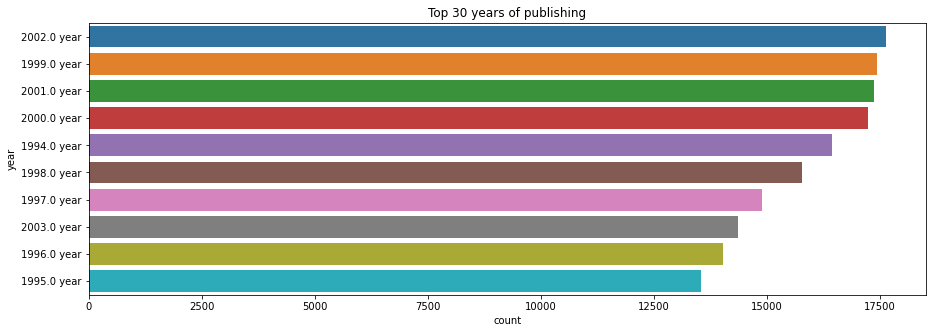

In [24]:
yearOP = Books['YearOfPublication'].value_counts().reset_index()

yearOP.columns = ['value', 'count']

yearOP['year'] = yearOP['value'].astype(str) + ' year'

yearOP = yearOP.sort_values('count',ascending=False)

plt.figure(figsize=(15,5))
plt.title('Top 30 years of publishing')
sns.barplot(data = yearOP.head(10), x='count', y="year");

In [25]:
Books['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102022, dtype: int64

Text(0.5, 1.0, 'Author Books Counts')

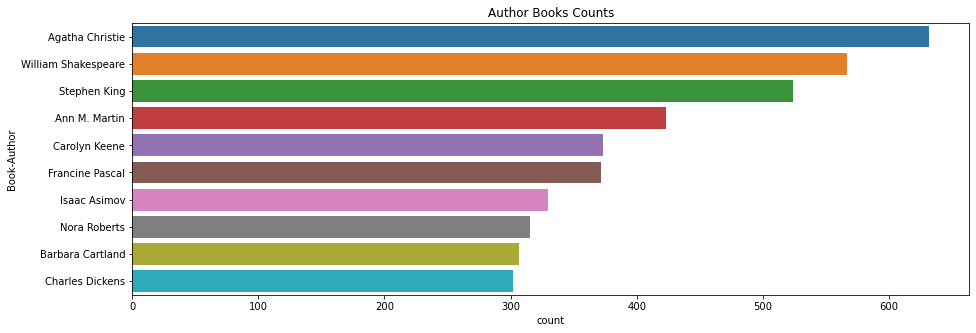

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(y='Book-Author',data=Books,order=pd.value_counts(Books['Book-Author']).iloc[:10].index)
plt.title('Author Books Counts')

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16805, dtype: int64


Text(0.5, 1.0, 'Top 10 Publishers')

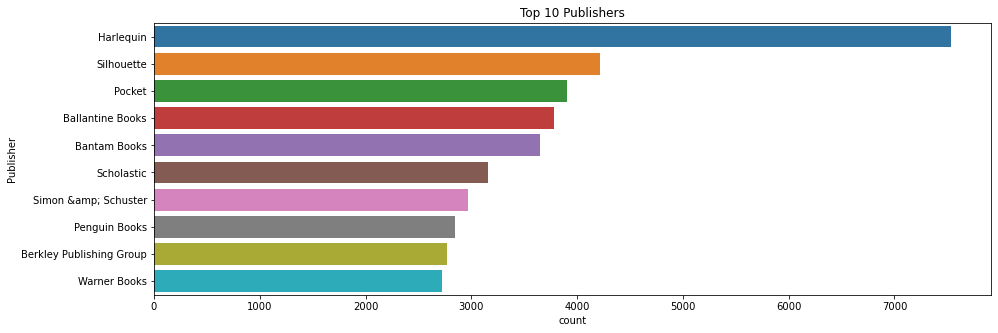

In [27]:
print(Books['Publisher'].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(y='Publisher',data=Books,order=pd.value_counts(Books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

# Checking Rating Dataset

In [28]:
print("Columns: ", list(Rating.columns))
Rating.head()

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [30]:
Rating.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [31]:
print(f'Duplicate entries: {Rating.duplicated().sum()}')

Duplicate entries: 0


Ratings dataset should have books only which exist in our books dataset

In [32]:
Rating_new = Rating[Rating.ISBN.isin(Books.ISBN)]
Rating.shape,Rating_new.shape

((1149780, 3), (1031136, 3))

rows having Books ISBN not part of books dataset

In [33]:
print("Shape of dataset before dropping",Rating_new.shape)
Rating_new = Rating_new[Rating_new['User-ID'].isin(User['User-ID'])]
print("shape of dataset after dropping",Rating_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


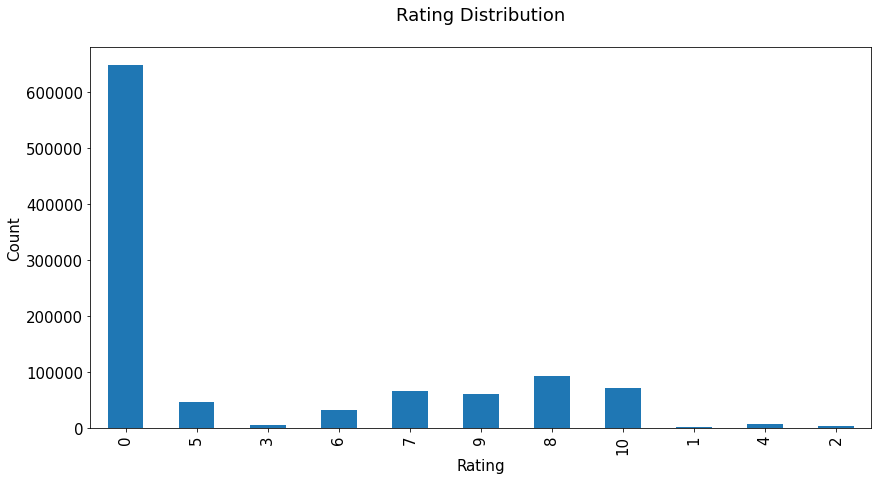

In [34]:
from IPython.core.pylabtools import figsize
figsize(14, 7)
plt.rc("font", size=15)
Rating_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0

In [35]:
#Hence segragating implicit and explict Rating datasets
Rating_explicit = Rating_new[Rating_new['Book-Rating'] != 0]
Rating_implicit = Rating_new[Rating_new['Book-Rating'] == 0]

In [36]:
print('Rating_explicit dataset shape',Rating_explicit.shape)
print('Rating_implicit dataset',Rating_implicit.shape)

Rating_explicit dataset shape (383842, 3)
Rating_implicit dataset (647294, 3)


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

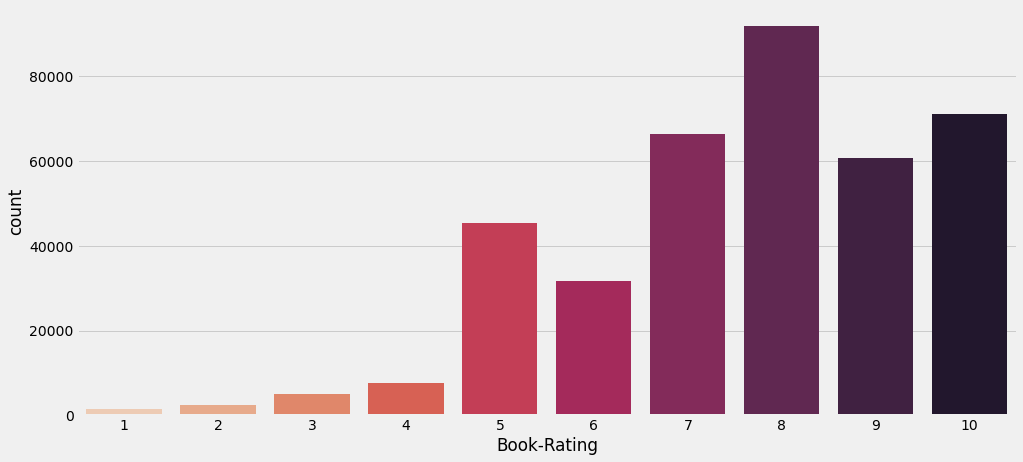

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7))
sns.countplot(data=Rating_explicit , x='Book-Rating', palette='rocket_r')

In [38]:
Rating_count = pd.DataFrame(Rating_explicit.groupby('ISBN')['Book-Rating'].count())
Rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [39]:
Rating_count = pd.DataFrame(Rating_explicit.groupby(['ISBN'])['Book-Rating'].sum())
Top10 = Rating_count.sort_values('Book-Rating',ascending = False).head(10)
print ("Following Books are Recommended")
Top10.merge(Books,left_index = True, right_on = 'ISBN')

Following Books are Recommended


,Book-Rating,ISBN,Book-Title,Book-Author,YearOfPublication,Publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star


In [40]:
# Create column Rating average 
Rating_explicit['Avg_Rating']=Rating_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
Rating_explicit['Total_No_Of_Users_Rated']=Rating_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [41]:
Rating_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


# Checking Users Dataset

In [42]:
User.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [43]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [44]:
User.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [45]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [46]:
missing_values(User)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


Age Distribution

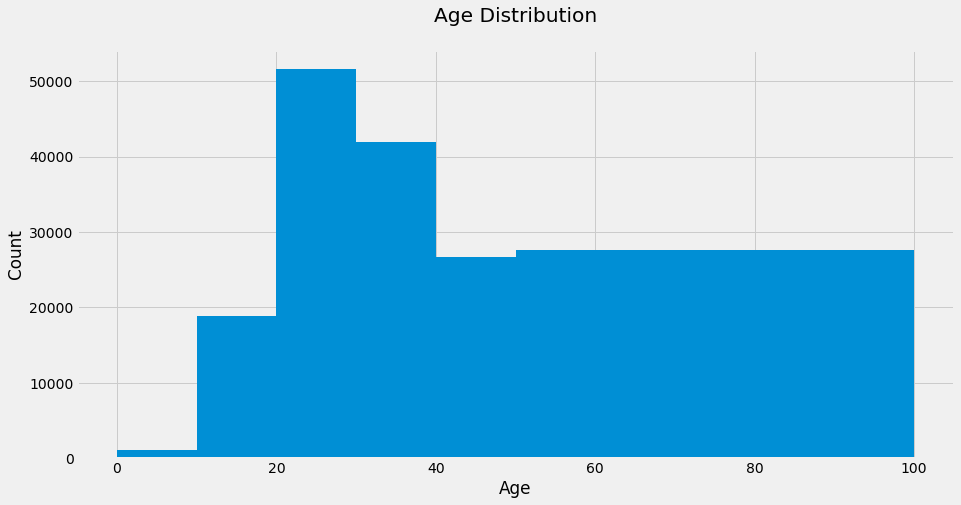

In [47]:
User.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most active users are from around 20 - 30

Check Outliers

Text(0.5, 1.0, 'Find outlier data in Age column')

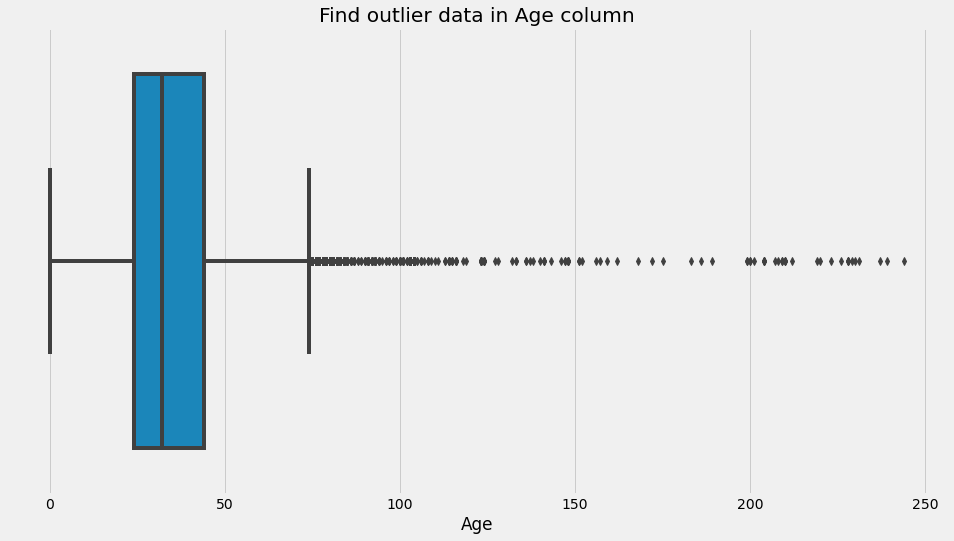

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Age', data=User)
plt.title('Find outlier data in Age column')

Text(0.5, 1.0, 'Age Distribution Plot')

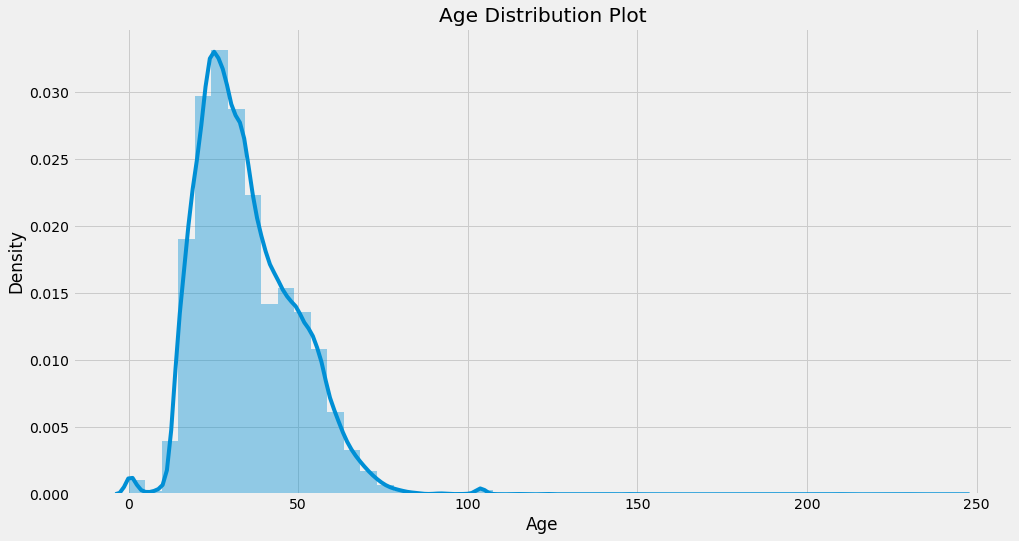

In [49]:
plt.figure(figsize=(15,8))
sns.distplot(User.Age)
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs

In [50]:
User.loc[(User.Age > 90) | (User.Age < 10), 'Age'] = np.nan

In [51]:
User.isnull().sum()

User-ID          0
Location         0
Age         112261
dtype: int64

For Location

In [52]:
User.Location.nunique()

57339

In [53]:
User.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [54]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       166597 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [55]:
User['Country']= User['Location'].str.split(',').str[-1]

In [56]:
User.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [57]:
User.drop(columns =["Location"], inplace = True)
User.head()

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa
2,3,NaN,russia
3,4,17.0,portugal
4,5,NaN,united kingdom


In [58]:
User.isnull().sum()

User-ID         0
Age        112261
Country         0
dtype: int64

Text(0.5, 1.0, 'Count of User Country wise')

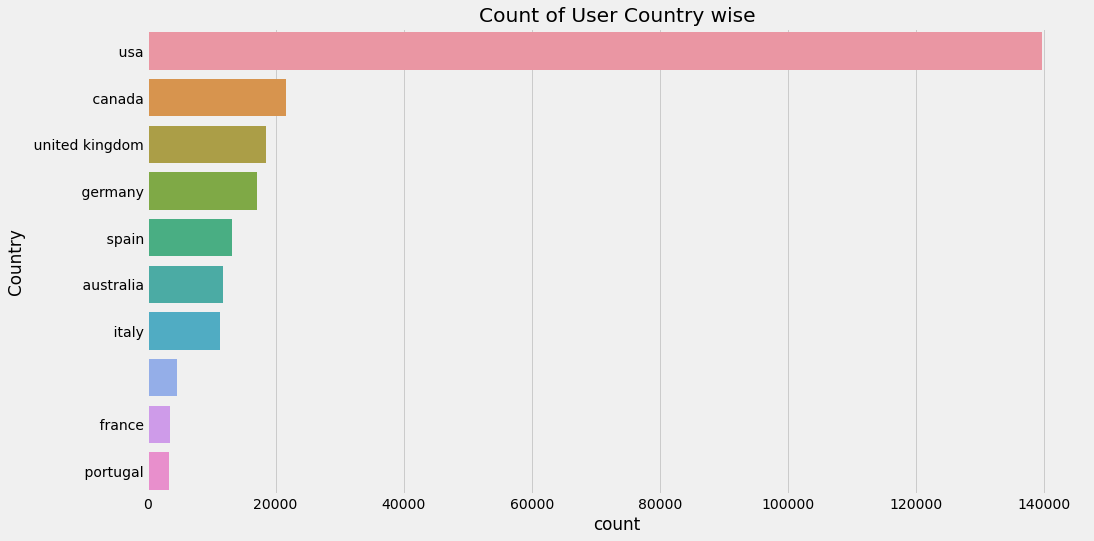

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(y='Country',data=User,order=pd.value_counts(User['Country']).iloc[:10].index)
plt.title('Count of User Country wise')

In [60]:
User['Age'].fillna(User.Age.mean(),inplace=True)
User.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

In [61]:
User.isnull().sum()

User-ID    0
Age        0
Country    0
dtype: int64

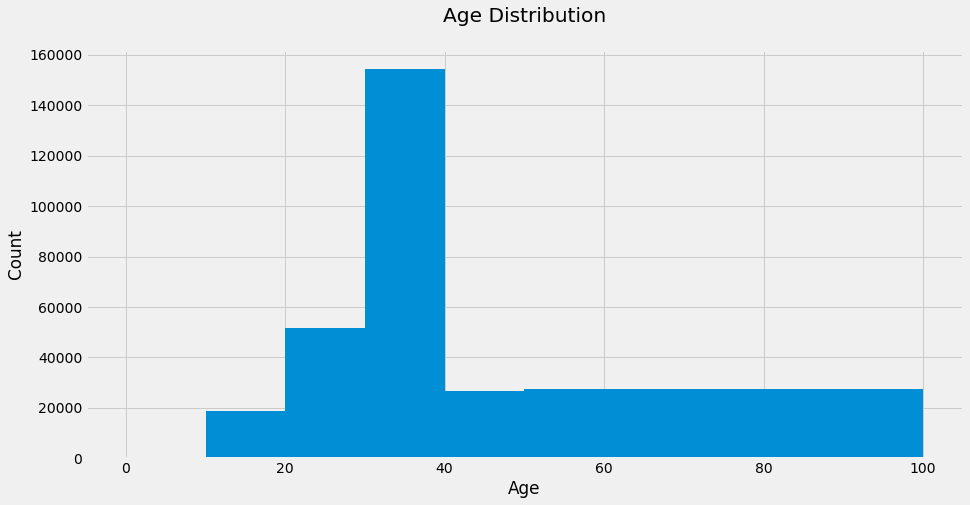

In [62]:
User.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Merge All Three Dataset

In [63]:
Dataset=User.copy()
Dataset=pd.merge(Dataset,Rating_explicit,on='User-ID')
Dataset=pd.merge(Dataset,Books,on='ISBN')
Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,YearOfPublication,Publisher
0,8,34.754311,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,34.754311,n/a,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.000000,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,34.754311,,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,34.754311,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [64]:
Dataset.rename(columns = {'Book-Rating':'BookRating','Book-Author':'BookAuthor'}, inplace = True)

In [65]:
missing_values(Dataset)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,BookRating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,BookAuthor,0,0.0,object
9,YearOfPublication,0,0.0,float64


# Weighted Rating

(WR)=[vR/(v+m)]+[mC/(v+m)]

where,

v is the number of votes for the books;

m is the minimum votes required to be listed in the chart;

R is the average rating of the book; and

C is the mean vote across the whole report.

Now we find the values of v,m,R,C.

User.drop_duplicates(keep='last', inp

In [66]:
User.drop_duplicates(keep='last', inplace=True)
User.reset_index(drop=True, inplace=True)

In [67]:
C= Dataset['Avg_Rating'].mean()
m= Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Dataset.loc[Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569504765 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.

In [68]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [69]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783
